In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
# initialize sentiment analyzer
sid = SentimentIntensityAnalyzer()

## Import Files

In [3]:
reviews = pd.read_csv('yelp_business_zipcodes_with_reviews.csv',usecols=['zipcode','all_reviews'])
reviews.head()

,zipcode,all_reviews
0,10019.0,Party of 5 Saturday night 5:30 resv. Got a coz...
1,10003.0,Great happy hour spot and food here is actuall...
2,10014.0,Came in here one late night with my boyfriend ...
3,11211.0,How have I never reviewed Baby's All Right bef...
4,10018.0,Awesome beer selection and friendly staff. We...


## Clean File

In [4]:
reviews = reviews[(reviews['zipcode'] >= 10001) & (reviews['zipcode'] <= 11697)]

In [5]:
reviews['zipcode'] = reviews['zipcode'].astype(int)

In [6]:
# Filter the zips we want only

pertinent_zips = [11102, 11103, 11105, 11106, 11101, 11104, 11109, 11120, 11206, 11211, 11249, 11207, 11221, 11237, 
                 10026, 10027, 10037, 10030, 10039, 10001, 10011, 10018, 10019, 10020, 10036, 10002, 10034, 10040,
                 10454, 10455, 10459, 10474, 11205, 11216, 11221, 11233, 11238, 11385, 11386, 10109, 11373,
                 11379, 11372, 11354, 11355, 11358, 11222]

reviews = reviews[reviews['zipcode'].isin(pertinent_zips)]

In [7]:
#dictionary to map zips to neighborhoods
zip_dict ={ 11101:'Astoria/LIC', 11102:'Astoria/LIC', 11103:'Astoria/LIC', 11105:'Astoria/LIC', 11106:'Astoria/LIC', 11104:'LIC',
           11109:'LIC', 11120:'LIC', 11206:'Williamsburg/Bushwick/Bed-Stuy', 11211:'Williamsburg', 11249:'Williamsburg', 11207:'Bushwick',
           11221:'Bed-Stuy/Bushwick', 11237:'Bushwick', 10026:'Harlem', 10027:'Harlem', 10037:'Harlem', 10030:'Harlem', 10039:'Harlem',
           10001:'Chelsea', 10011:'Chelsea', 10018:'Chelsea', 10019:'Chelsea', 10020:'Chelsea', 10036:'Chelsea', 10002:'LES',
           10034: 'Inwood', 10040: 'Inwood', 10454: 'South Bronx', 10455: 'South Bronx', 10459: 'South Bronx', 10474: 'South Bronx', 
           11205: 'Bed-Stuy', 11216: 'Bed-Stuy', 11233: 'Bed-Stuy', 11238: 'Bed-Stuy',
           11385: 'Ridgewood', 11386: 'Ridgewood', 10109: 'Times Square', 
           11373: 'Elmhurst', 11379: 'Elmhurst', 11372: 'Jackson Heights', 
           11354: 'Flushing', 11355: 'Flushing', 11358: 'Flushing', 11222: 'Greenpoint'}

In [8]:
reviews['Neighborhood']= reviews['zipcode'].map(zip_dict)

In [9]:
reviews['all_reviews'] = reviews['all_reviews'].astype(str)

In [10]:
reviews.head()

,zipcode,all_reviews,Neighborhood
0,10019,Party of 5 Saturday night 5:30 resv. Got a coz...,Chelsea
3,11211,How have I never reviewed Baby's All Right bef...,Williamsburg
4,10018,Awesome beer selection and friendly staff. We...,Chelsea
9,11101,I came here on a Saturday night around 6pm. Th...,Astoria/LIC
11,10002,"Really fun, unique and awesome bar.\n\nI defin...",LES


## Groupby Neighborhood, Concatenate Reviews for each Neighborhood

In [11]:
## Concatenate all reviews for each neighborhood into one cell
def new_1(g):
    return ','.join(g.all_reviews)

df_reviews = reviews.groupby("Neighborhood").apply(new_1).to_frame(name="new_1")
del df_reviews.index.name

## Sentiment Analysis

Done for each business, and then made into pivot table groupedBy Neighborhood, with avg. values taken

In [12]:
# calculate sentiment scores for each venue's reviews

for i, row in reviews.iterrows():
    rev = row['all_reviews']
    sentiment = sid.polarity_scores(str(rev))
    reviews.loc[i, 'neg'] = sentiment['neg']
    reviews.loc[i, 'neu'] = sentiment['neu']
    reviews.loc[i, 'pos'] = sentiment['pos']
    reviews.loc[i, 'compound'] = sentiment['compound']



In [13]:
df3 = reviews.pivot_table(values=['neg', 'neu', 'pos','compound'], columns=['Neighborhood'], aggfunc='mean')
df3 = df3.T
df3.reset_index()
del df3.index.name

In [14]:
df3

,compound,neg,neu,pos
Astoria/LIC,0.744572,0.042356,0.758322,0.199280
Bed-Stuy,0.722024,0.041087,0.762112,0.196806
Bed-Stuy/Bushwick,0.746018,0.054525,0.747850,0.197750
Bushwick,0.712353,0.046553,0.744092,0.209329
Chelsea,0.722132,0.043130,0.766240,0.190640
Elmhurst,0.555555,0.048682,0.779364,0.172136
Flushing,0.650643,0.058000,0.741903,0.200000
Greenpoint,0.782967,0.046474,0.745316,0.208211
Harlem,0.768749,0.038886,0.758772,0.202342
Inwood,0.674855,0.048262,0.740310,0.211405


## Sentiment Analysis on Groupby Neighborhood dataframe

In [15]:
df_reviews.head()

,new_1
Astoria/LIC,I came here on a Saturday night around 6pm. Th...
Bed-Stuy,There are literally no restaurants around thes...
Bed-Stuy/Bushwick,"Attractive, cozy bar which is very hospitable ..."
Bushwick,Came in for lunch on a Wednesday with my boyfr...
Chelsea,Party of 5 Saturday night 5:30 resv. Got a coz...


In [16]:
for i, row in df_reviews.iterrows():
    rev = row['new_1']
    sentiment = sid.polarity_scores(str(rev))
    df_reviews.loc[i, 'neg'] = sentiment['neg']
    df_reviews.loc[i, 'neu'] = sentiment['neu']
    df_reviews.loc[i, 'pos'] = sentiment['pos']
    df_reviews.loc[i, 'compound'] = sentiment['compound']

In [17]:
df_reviews

,new_1,neg,neu,pos,compound
Astoria/LIC,I came here on a Saturday night around 6pm. Th...,0.071,0.709,0.220,1.0000
Bed-Stuy,There are literally no restaurants around thes...,0.045,0.704,0.251,1.0000
Bed-Stuy/Bushwick,"Attractive, cozy bar which is very hospitable ...",0.059,0.681,0.260,1.0000
Bushwick,Came in for lunch on a Wednesday with my boyfr...,0.047,0.684,0.270,1.0000
Chelsea,Party of 5 Saturday night 5:30 resv. Got a coz...,0.041,0.713,0.246,1.0000
Elmhurst,This is one of those little places that are ge...,0.076,0.737,0.187,0.9998
Flushing,My favorite bar in New York. I only recently d...,0.046,0.693,0.261,1.0000
Greenpoint,Zach (DJ Kernsy) was the best DJ we could have...,0.048,0.701,0.251,1.0000
Harlem,This is a cool spot in Harlem for good music a...,0.042,0.707,0.250,1.0000
Inwood,Great crowd and really good music. I went ther...,0.053,0.684,0.264,1.0000


In [18]:
df_reviews.columns

Index(['new_1', 'neg', 'neu', 'pos', 'compound'], dtype='object')

In [19]:
df_reviews = df_reviews[['neg', 'neu', 'pos']]
df_reviews

,neg,neu,pos
Astoria/LIC,0.071,0.709,0.220
Bed-Stuy,0.045,0.704,0.251
Bed-Stuy/Bushwick,0.059,0.681,0.260
Bushwick,0.047,0.684,0.270
Chelsea,0.041,0.713,0.246
Elmhurst,0.076,0.737,0.187
Flushing,0.046,0.693,0.261
Greenpoint,0.048,0.701,0.251
Harlem,0.042,0.707,0.250
Inwood,0.053,0.684,0.264


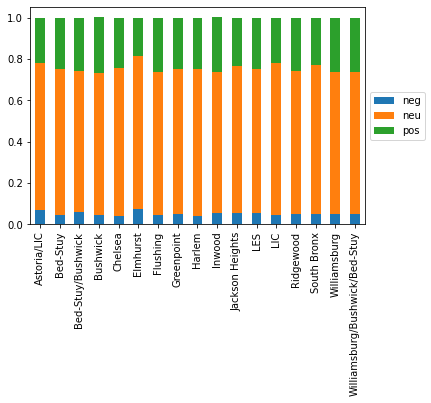

In [20]:
fig, ax = plt.subplots() #get axis to plot on

df_reviews.plot(ax=ax,kind='bar', stacked=True) #show the data
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [22]:
df_reviews = df_reviews.reset_index()

,index,neg,neu,pos
0,Astoria/LIC,0.071,0.709,0.220
1,Bed-Stuy,0.045,0.704,0.251
2,Bed-Stuy/Bushwick,0.059,0.681,0.260
3,Bushwick,0.047,0.684,0.270
4,Chelsea,0.041,0.713,0.246
5,Elmhurst,0.076,0.737,0.187
6,Flushing,0.046,0.693,0.261
7,Greenpoint,0.048,0.701,0.251
8,Harlem,0.042,0.707,0.250
9,Inwood,0.053,0.684,0.264


In [26]:
df_reviews = df_reviews.rename(columns={"index": "Neighborhood"})

In [28]:
#df_reviews.to_csv('SentimentAnalysis.csv', index = False, header=True)